In [1]:
pip install diffprivlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import diffprivlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.metrics import recall_score,precision_score,f1_score,balanced_accuracy_score

In [3]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [4]:
df['Diabetes_binary'] = df['Diabetes_012'].apply(lambda x: 1 if x in [1, 2] else 0)

In [5]:
df.drop('Diabetes_012',axis=1,inplace=True)

In [6]:
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']




X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [8]:
def return_model_res(df_prep,imputation,model,imb_approach,scaling,y_test,y_hat):

    model_results = {'DF prep':df_prep,'Model Name':model.__class__.__name__,
                        'Imputaion':imputation,
                        'Imbalance Approach': imb_approach,
                        'Scaling': scaling,
                        'Accuracy':round(accuracy_score(y_test,y_hat),2),
                        'Balanced Accuracy':round(balanced_accuracy_score(y_test,y_hat),2),
                        'Precision':round(precision_score(y_test,y_hat,average='macro'),2),
                        'F1-Score':round(f1_score(y_test,y_hat,average='macro'),2),
                        'Recall': round(recall_score(y_test,y_hat,average='macro'),2),
                        'ROC_AUC':round(roc_auc_score(y_test,y_hat),2)}
    return model_results # returns a dict with the metrics for the chosen model etc

In [9]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
rf = RandomForestClassifier()
rf.fit(X_train_sc,y_train)
X_test_sc = scaler.transform(X_test)
y_pred = rf.predict(X_test_sc)
res = return_model_res(None,None,rf,None,"StandardScaler",y_test,y_pred)
res

{'DF prep': None,
 'Model Name': 'RandomForestClassifier',
 'Imputaion': None,
 'Imbalance Approach': None,
 'Scaling': 'StandardScaler',
 'Accuracy': 0.84,
 'Balanced Accuracy': 0.59,
 'Precision': 0.68,
 'F1-Score': 0.6,
 'Recall': 0.59,
 'ROC_AUC': 0.59}

In [11]:
from sklearn.utils import resample

# Assuming the dataset is already loaded into df and 'Diabetes_binary' is created

# Separate majority and minority classes
df_majority = df[df.Diabetes_binary == 0]
df_minority = df[df.Diabetes_binary == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority), # to match minority class
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Prepare the feature matrix X and target vector y
X = df_downsampled.drop(['Diabetes_binary'], axis=1)
y = df_downsampled['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc= scaler.transform(X_test)

# Train a Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)
# accuracy= accuracy_score(y_test, y_pred)
# recall = recall_score(y_test,y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)
# print("\nClassification Report:")
# print(class_report)
# print("\nAccuracy Score:")
# print(accuracy)
# print("\nRecall Score:")
# print(recall)
print(y_pred)
ds_res = return_model_res(None,None,clf,None,"StandardScaler",y_test,y_pred)
ds_res



[0 0 1 ... 1 1 1]


{'DF prep': None,
 'Model Name': 'RandomForestClassifier',
 'Imputaion': None,
 'Imbalance Approach': None,
 'Scaling': 'StandardScaler',
 'Accuracy': 0.73,
 'Balanced Accuracy': 0.73,
 'Precision': 0.73,
 'F1-Score': 0.73,
 'Recall': 0.73,
 'ROC_AUC': 0.73}

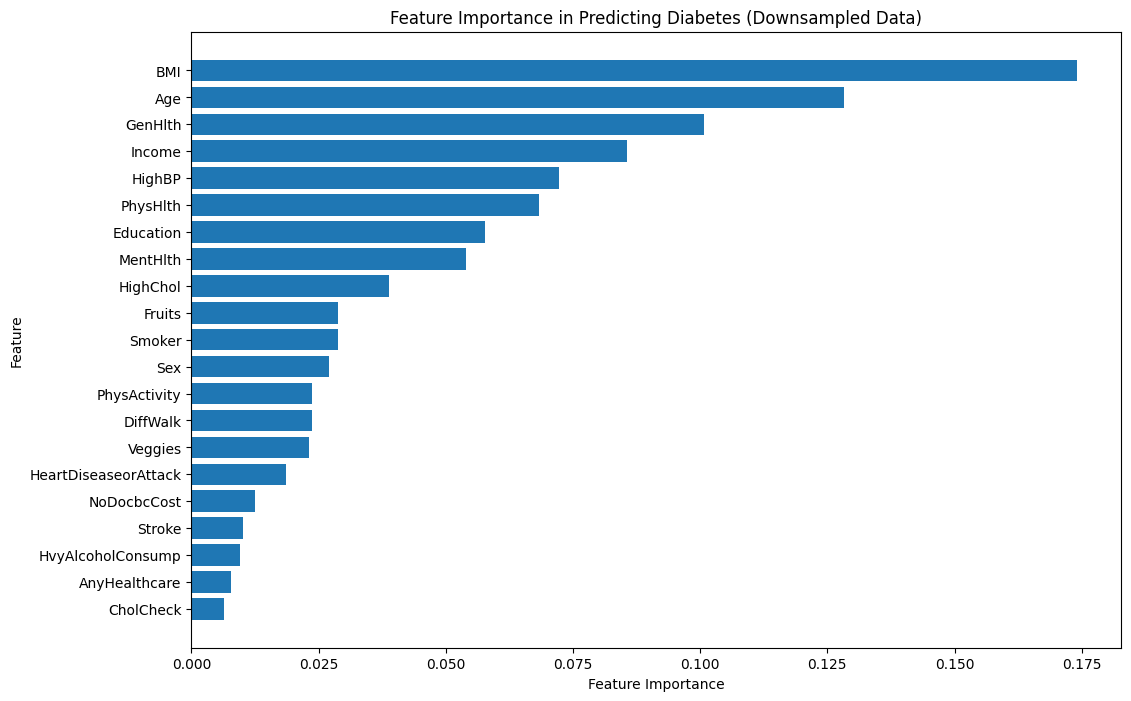

In [12]:
# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Diabetes (Downsampled Data)')
plt.gca().invert_yaxis()
plt.show()

In [13]:
# List of features to drop
features_to_drop = ['NoDocbcCost', 'Stroke', 'HvyAlcoholConsump', 'AnyHealthcare', 'CholCheck']

# Drop the features
X_selected = X.drop(columns=features_to_drop)


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [18]:
fs_res = return_model_res(None,None,rf_model,None,"StandardScaler",y_test,y_pred)
fs_res


{'DF prep': None,
 'Model Name': 'RandomForestClassifier',
 'Imputaion': None,
 'Imbalance Approach': None,
 'Scaling': 'StandardScaler',
 'Accuracy': 0.73,
 'Balanced Accuracy': 0.73,
 'Precision': 0.73,
 'F1-Score': 0.73,
 'Recall': 0.73,
 'ROC_AUC': 0.73}

In [21]:
X_selected = X.drop(columns=features_to_drop)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=180, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [22]:
fs_res = return_model_res(None,None,rf_model,None,"StandardScaler",y_test,y_pred)
fs_res


{'DF prep': None,
 'Model Name': 'RandomForestClassifier',
 'Imputaion': None,
 'Imbalance Approach': None,
 'Scaling': 'StandardScaler',
 'Accuracy': 0.73,
 'Balanced Accuracy': 0.73,
 'Precision': 0.73,
 'F1-Score': 0.73,
 'Recall': 0.73,
 'ROC_AUC': 0.73}